In [8]:
# Load all uploaded CSVs to prepare for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
match_stats_path = "2025_SU_Lacrosse_Matches_Stats.csv"
period_stats_path = "2025_SU_Lacrosse_Period_Stats.csv"
player_stats_path = "2025_SU_Lacrosse_Player_Stats.csv"
team_stats_path = "2025_SU_Lacrosse_Team_Stats.csv"

In [9]:
# Read the CSV files
match_df = pd.read_csv(match_stats_path)
period_df = pd.read_csv(period_stats_path)
player_df = pd.read_csv(player_stats_path)
team_df = pd.read_csv(team_stats_path)

In [10]:
# Display basic structure of the data
match_df.head(), period_df.head(), player_df.head(), team_df.head()

(     Date              Opponent Result  SU_Score  OPP_Score  Attendance
 0  Feb-07               UALBANY      W        21          9        2127
 1  Feb-15        at #7 Maryland      W        15          9         758
 2  Feb-18               CORNELL      W        18         10        2214
 3  Feb-22  at #2 North Carolina      L         8         16        1088
 4  Feb-25       #3 NORTHWESTERN      L         8         12        2080,
   Period  SU_Goals  OPP_Goals  SU_Saves  OPP_Saves  SU_Shots  OPP_Shots  \
 0    1st        74         64        43         39       145        154   
 1    2nd        65         52        42         48       147        143   
 2    3rd        48         45        37         40       129        115   
 3    4th        47         59        39         39       114        138   
 4     OT         0          1         1          2         2          2   
 
    SU_SOG  OPP_SOG  
 0     113      107  
 1     113       94  
 2      88       82  
 3      86     

Q1: How many games did SU play in 2025?

In [11]:
total_games = len(match_df)
print(f"Total games played: {total_games}")


Total games played: 19


Q2: How many games were wins vs losses?

In [12]:
wins = len(match_df[match_df['Result'].str.startswith("W")])
losses = total_games - wins
print(f"Wins: {wins}, Losses: {losses}")


Wins: 10, Losses: 9


Player-Level Summary

In [14]:
player_df.describe()

,GP,G,A,Pts,Sh,Gw,GB,DC,TO,CT
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,11.218750,7.312500,3.500000,10.812500,16.812500,0.312500,9.218750,7.718750,7.781250,4.781250
std,7.119869,10.648148,8.428064,17.321323,24.400473,0.820602,10.897571,15.623048,10.375947,8.019067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.750000,0.000000
50%,12.000000,1.000000,0.000000,1.000000,2.500000,0.000000,5.500000,1.000000,3.500000,1.000000
75%,19.000000,14.000000,4.250000,16.750000,31.750000,0.000000,14.250000,8.750000,10.250000,8.250000
max,19.000000,34.000000,46.000000,76.000000,77.000000,4.000000,34.000000,75.000000,41.000000,40.000000


Most goals by a player

In [15]:
top_scorer = player_df.sort_values("G", ascending=False)[["PLAYER", "G"]].head(5)
print(top_scorer)

              PLAYER   G
2      Emma Muchnick  34
1  Caroline Trinkaus  32
0          Emma Ward  30
4     Alexa Vogelman  21
5     Mileena Cotter  21


Top draw controls

In [16]:
top_draw_controls = player_df.sort_values("DC", ascending=False)[["PLAYER", "DC"]].head(5)
print(top_draw_controls)

             PLAYER  DC
14      Meghan Rode  75
6   Joely Caramelli  39
4    Alexa Vogelman  31
5    Mileena Cotter  24
2     Emma Muchnick  13


What was the team’s average attendance in home vs. away games?

In [19]:
match_df['Location'] = match_df['Opponent'].apply(lambda x: 'Home' if not x.startswith('at') and 'vs' not in x else ('Neutral' if 'vs' in x else 'Away'))
match_df.groupby('Location')['Attendance'].mean()

Location
Away        568.25
Home       2393.00
Neutral     291.50
Name: Attendance, dtype: float64

Which quarter had the worst defensive performance for SU?

In [20]:
period_df['Goal_Diff'] = period_df['SU_Goals'] - period_df['OPP_Goals']
period_df.sort_values('Goal_Diff')  # lowest first

,Period,SU_Goals,OPP_Goals,SU_Saves,OPP_Saves,SU_Shots,OPP_Shots,SU_SOG,OPP_SOG,Goal_Diff
3,4th,47,59,39,39,114,138,86,98,-12
4,OT,0,1,1,2,2,2,2,2,-1
5,OT2,1,0,0,0,1,0,1,0,1
2,3rd,48,45,37,40,129,115,88,82,3
0,1st,74,64,43,39,145,154,113,107,10
1,2nd,65,52,42,48,147,143,113,94,13
6,Total,235,221,162,168,538,552,403,383,14


Who is the most complete player (balance of goals, assists, low TO)?

In [21]:
player_df['Efficiency'] = (player_df['G'] + player_df['A']) - player_df['TO']
player_df.sort_values('Efficiency', ascending=False).head()

,PLAYER,GP,G,A,Pts,Sh,Gw,GB,DC,TO,CT,Efficiency
0,Emma Ward,19,30,46,76,77,1,6,0,41,2,35
1,Caroline Trinkaus,19,32,11,43,72,4,6,8,16,5,27
3,Gracie Britton,19,20,10,30,41,0,8,1,16,0,14
6,Joely Caramelli,19,16,4,20,46,0,24,39,8,11,12
2,Emma Muchnick,19,34,7,41,71,2,27,13,31,9,10


Which player has the most impact in transition (DC + GB - TO)?

In [22]:
player_df['TransitionImpact'] = player_df['DC'] + player_df['GB'] - player_df['TO']
player_df.sort_values('TransitionImpact', ascending=False).head()

,PLAYER,GP,G,A,Pts,Sh,Gw,GB,DC,TO,CT,Efficiency,TransitionImpact
14,Meghan Rode,17,1,0,1,3,0,1,75,4,0,-3,72
6,Joely Caramelli,19,16,4,20,46,0,24,39,8,11,12,55
18,Kaci Benoit,19,0,0,0,2,0,34,13,5,12,-5,42
31,Daniella Guyette,19,0,0,0,0,0,28,8,2,2,-2,34
27,Coco Vandiver,9,0,0,0,0,0,34,1,3,40,-3,32


Does winning correlate with higher scoring in the 1st period?

In [23]:
# Sum 1st period SU goals across matches they won
won_games = match_df[match_df['Result'].str.startswith('W')]
period_df.loc[0, 'SU_Goals']  # 1st period total

74

Which player should SU build around to win two more games next season?
Consider:

Offensive efficiency (G+A)

Possession safety (low TO)

Draw control & ground ball dominance

In [24]:
# Combine multiple features into a custom score
player_df['GameChangerScore'] = (
    player_df['G'] + player_df['A'] + player_df['DC'] + player_df['GB'] - player_df['TO']
)
player_df.sort_values('GameChangerScore', ascending=False).head(5)


,PLAYER,GP,G,A,Pts,Sh,Gw,GB,DC,TO,CT,Efficiency,TransitionImpact,GameChangerScore
6,Joely Caramelli,19,16,4,20,46,0,24,39,8,11,12,55,75
14,Meghan Rode,17,1,0,1,3,0,1,75,4,0,-3,72,73
4,Alexa Vogelman,19,21,6,27,46,0,25,31,27,13,0,29,56
2,Emma Muchnick,19,34,7,41,71,2,27,13,31,9,10,9,50
18,Kaci Benoit,19,0,0,0,2,0,34,13,5,12,-5,42,42


How did SU perform in neutral-site games vs regular season?

In [25]:
match_df[match_df['Location'] == 'Neutral'].mean(numeric_only=True)
match_df[match_df['Location'] != 'Neutral'].mean(numeric_only=True)


SU_Score        12.352941
OPP_Score       11.588235
Attendance    1534.294118
dtype: float64

Did any player have zero goals, assists, and still high TO or CT?

In [26]:
player_df[(player_df['G'] == 0) & (player_df['A'] == 0) & ((player_df['TO'] > 3) | (player_df['CT'] > 3))]

,PLAYER,GP,G,A,Pts,Sh,Gw,GB,DC,TO,CT,Efficiency,TransitionImpact,GameChangerScore
17,Izzy Lahah,6,0,0,0,2,0,7,1,1,8,-1,7,7
18,Kaci Benoit,19,0,0,0,2,0,34,13,5,12,-5,42,42
24,Superia Clark,16,0,0,0,0,0,14,2,7,13,-7,9,9
27,Coco Vandiver,9,0,0,0,0,0,34,1,3,40,-3,32,32


C:\Users\abhis\AppData\Local\Temp\ipykernel_7356\4119704896.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="G", y="PLAYER", data=player_df.sort_values("G", ascending=False).head(10), palette="Blues_d")


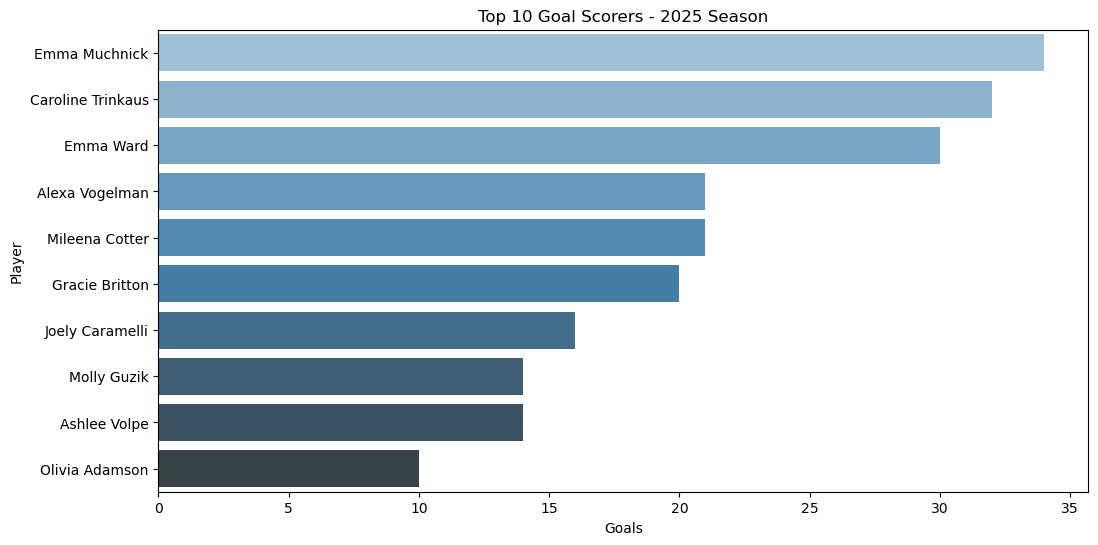

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x="G", y="PLAYER", data=player_df.sort_values("G", ascending=False).head(10), palette="Blues_d")
plt.title("Top 10 Goal Scorers - 2025 Season")
plt.xlabel("Goals")
plt.ylabel("Player")
plt.show()


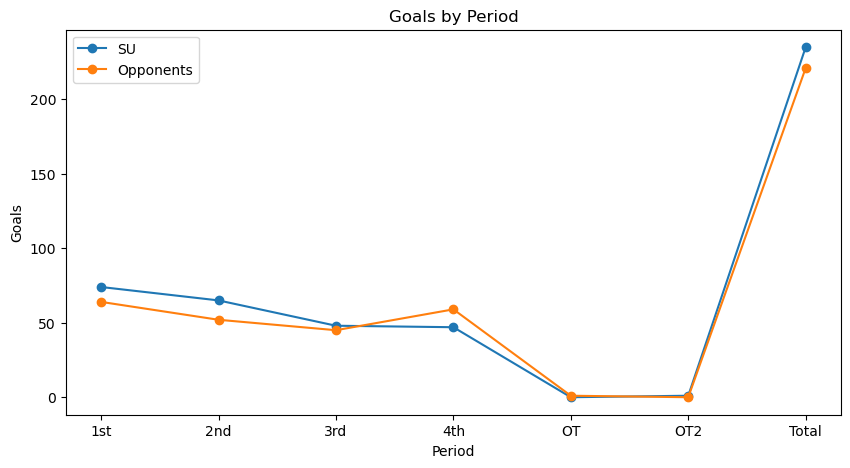

In [18]:
plt.figure(figsize=(10,5))
plt.plot(period_df["Period"], period_df["SU_Goals"], marker='o', label="SU")
plt.plot(period_df["Period"], period_df["OPP_Goals"], marker='o', label="Opponents")
plt.title("Goals by Period")
plt.xlabel("Period")
plt.ylabel("Goals")
plt.legend()
plt.show()


C:\Users\abhis\AppData\Local\Temp\ipykernel_7356\134332021.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="GameChangerScore", y="PLAYER", data=top_game_changers, palette="coolwarm")


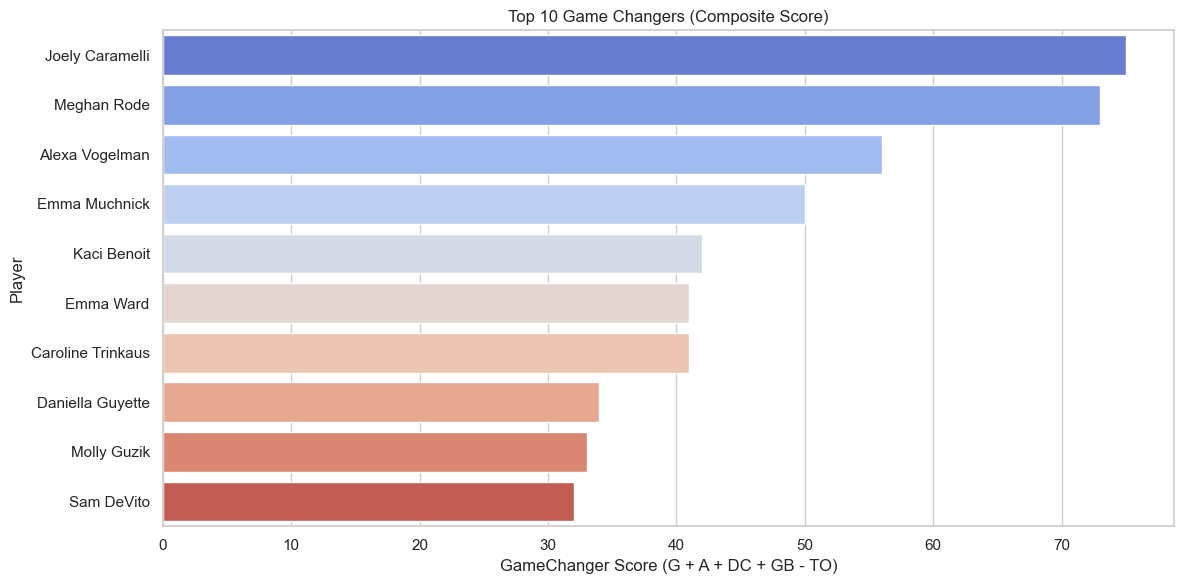

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# 1. Top 10 players by GameChangerScore (G + A + DC + GB - TO)
player_df["GameChangerScore"] = (
    player_df["G"] + player_df["A"] + player_df["DC"] + player_df["GB"] - player_df["TO"]
)

top_game_changers = player_df.sort_values("GameChangerScore", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x="GameChangerScore", y="PLAYER", data=top_game_changers, palette="coolwarm")
plt.title("Top 10 Game Changers (Composite Score)")
plt.xlabel("GameChanger Score (G + A + DC + GB - TO)")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

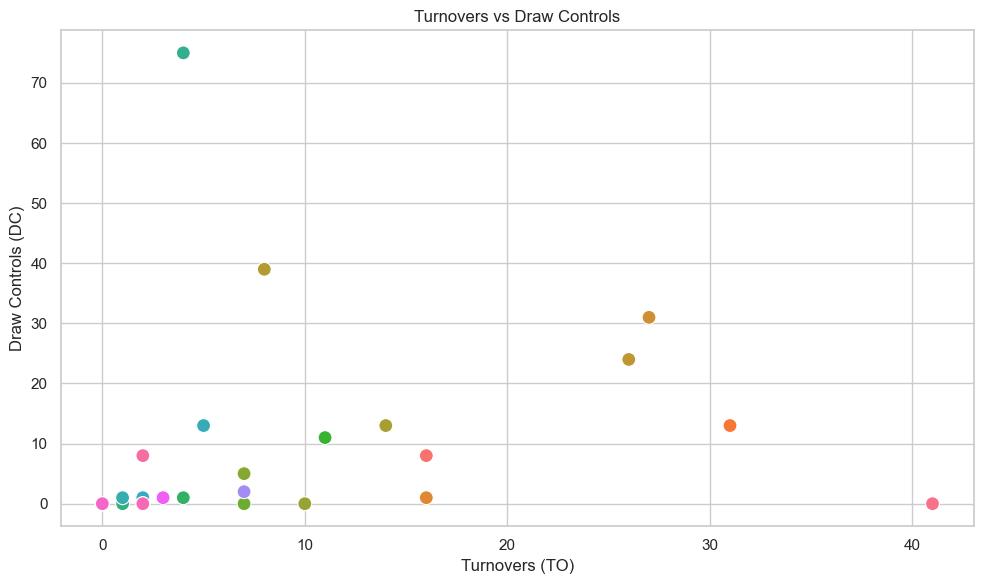

In [28]:
# 2. Turnovers vs Draw Controls Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TO", y="DC", data=player_df, hue="PLAYER", s=100, legend=False)
plt.title("Turnovers vs Draw Controls")
plt.xlabel("Turnovers (TO)")
plt.ylabel("Draw Controls (DC)")
plt.grid(True)
plt.tight_layout()
plt.show()


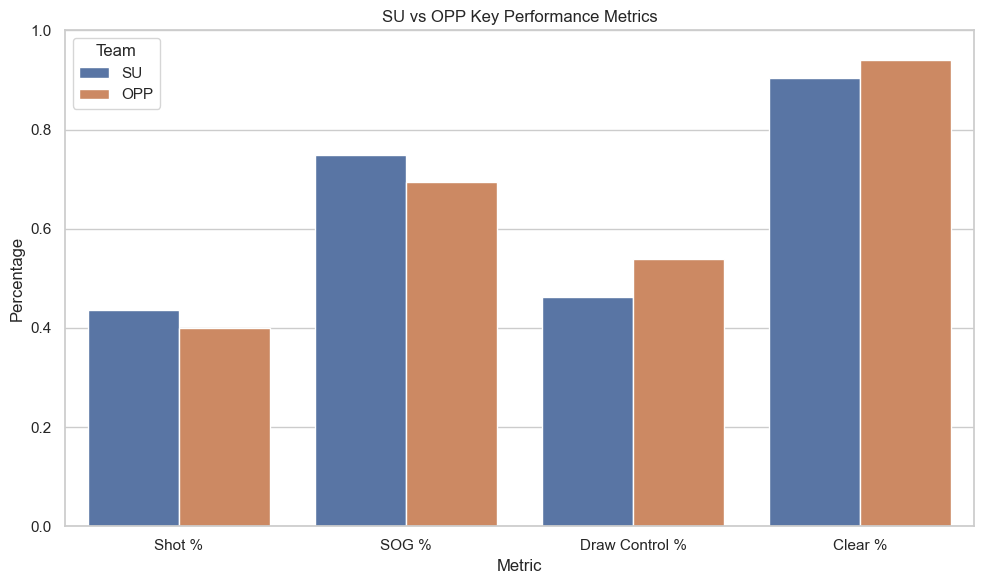

In [29]:
# 3. SU vs Opponent Shooting Accuracy and Draw Control Comparison
comparison_df = pd.DataFrame({
    "Metric": ["Shot %", "SOG %", "Draw Control %", "Clear %"],
    "SU": [0.437, 0.749, 240 / (240 + 280), 359 / 397],
    "OPP": [0.400, 0.694, 280 / (240 + 280), 335 / 356],
})

comparison_df_melted = comparison_df.melt(id_vars="Metric", var_name="Team", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Value", hue="Team", data=comparison_df_melted)
plt.title("SU vs OPP Key Performance Metrics")
plt.ylim(0, 1)
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()